# **Implement Random Forest on the dataset**

**Recession Prediction**



**Team :** transformers-stock-market-prediction



**Team Members:**



Anand Muralidhara




Amrutha Singh Balaji Singh




Poorva Agarwal




Snehal Yeole



**Individual Contributions:**

1. Data Cleaning, Data Pre-processing and Splitting the dataset into features and target variable - **Snehal Yeole (012548471)**


2. Pair Plot to visualize the dataset distribution - **Snehal Yeole (012548471)**



3. Split the features and target variable into Training and Testing sets - **Amrutha Singh Balaji Singh (013778583)**


4. Implementation of Decision Tree Classifier - **Amrutha Singh Balaji Singh (013778583)**


5. Visualization of Decision Tree Classifier - **Poorva Agarwal (013770939)**



6. Calculate Classificaton Report and Confusion Matrix - **Poorva Agarwal (013770939)**



7. Implementation of Random Forest - **Anand Muralidhara (013752622)**



8. Visualization of Random Forest -  **Anand Muralidhara (013752622)**




**Data Set Used:**


quarterly-nasdaq-gdp-unemp-ind-yield.csv


The dataset can be found on the common google drive under **“transformers-stock-market-prediction”** folder.


Below is the link:



https://drive.google.com/drive/u/1/folders/1qgsOPA2svJ-58u5zurF1NScUPu9ZJSEP


**DATA NARRATIVE**



**Use Case:**



* Predict the bubble formation and upcoming Recession based on factors that are major players leading to Recession



*  Retrieve the insights from the Recession dataset on market growth trend. How the market is doing? which will help people channelize their investments



**Purpose of this assignment:**



The purpose of this assignment is Binary classification for 'RECESSION = Yes/No' based on 'NASDAQ', 'UNEMPLOY', 'YIELD', 'GDP', and 'INDUSTRY' columns


**Assignment description:**


In order to implement Random Forest on our 'Recession' dataset, we have split the columns in dataset into two categories:



1.   **Independent Variables (Features) :** 'NASDAQ', 'UNEMPLOY', 'YIELD', 'GDP', and 'INDUSTRY'


2.   **Dependent Variable (Target) :**  'RECESSION'


**Observations:**



*   Accuracy score for Decision Tree Classifier is 76.47%


*   We are getting **Classification report** as below:

precision    recall  f1-score   support


           0       0.85      0.85      0.85        27
           
           1       0.43      0.43      0.43         7
           
    accuracy                           0.76        34
    
   macro avg       0.64      0.64      0.64        34
   
weighted avg       0.76      0.76      0.76        34



*   Visualization of Decision Tree Classifier - The 'GDP' factor with highest **information gain** is the root node (best splitting criteria) for all the other attributes in dataset



*   Visualization of Random Forest  - The 'INDUSTRY' factor with highest **information gain** is the root node (best splitting criteria) for all the other attributes in dataset


    
    
*   Accuracy score for model is 79.11%



*   Visualization of Confusion matrix




**Import required libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data = pd.read_csv("/content/drive/My Drive/cmpe257.csv", sep=',' , usecols=['DATE','NASDAQ','UNEMPLOY','YIELD','GDP','INDUSTRY','RECESSION'])
data

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


,DATE,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY,RECESSION
0,10/1/77,101.216508,6654.666667,-69.00365,301.148,3.287300,0
1,1/1/78,102.436452,6381.333333,-64.99132,250.297,2.183100,0
2,4/1/78,117.489531,6111.666667,-74.26246,376.704,2.710667,0
3,7/1/78,130.087143,6171.333333,-97.95441,330.983,2.632567,0
4,10/1/78,119.848413,6084.000000,-211.76856,420.103,3.244300,0
5,1/1/79,125.492064,6130.333333,-247.49419,412.063,3.607767,0
6,4/1/79,133.444603,5956.000000,-248.25242,174.673,1.493500,1
7,7/1/79,144.743333,6168.666667,-2720.95238,158.703,0.894100,1
8,10/1/79,142.523750,6286.333333,120.02580,86.448,0.164133,1
9,1/1/80,152.525238,6704.666667,85.76788,95.787,0.155167,1


**Print first five records from the dataset**

In [2]:
data.head(5)

,DATE,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY,RECESSION
0,10/1/77,101.216508,6654.666667,-69.00365,301.148,3.287300,0
1,1/1/78,102.436452,6381.333333,-64.99132,250.297,2.183100,0
2,4/1/78,117.489531,6111.666667,-74.26246,376.704,2.710667,0
3,7/1/78,130.087143,6171.333333,-97.95441,330.983,2.632567,0
4,10/1/78,119.848413,6084.000000,-211.76856,420.103,3.244300,0


**Data Cleaning and Data Preprocessing step**

In [4]:
scaler = MinMaxScaler()
scaler.fit(data.UNEMPLOY.values.reshape(-1,1))
data.UNEMPLOY = scaler.transform(data.UNEMPLOY.values.reshape(-1,1))

scaler.fit(data.NASDAQ.values.reshape(-1,1))
data.NASDAQ = scaler.transform(data.NASDAQ.values.reshape(-1,1))

scaler.fit(data.YIELD.values.reshape(-1,1))
data.YIELD = scaler.transform(data.YIELD.values.reshape(-1,1))

scaler.fit(data.GDP.values.reshape(-1,1))
data.GDP = scaler.transform(data.GDP.values.reshape(-1,1))

scaler.fit(data.INDUSTRY.values.reshape(-1,1))
data.INDUSTRY = scaler.transform(data.INDUSTRY.values.reshape(-1,1))

#Print the entire dataset after scaling
data

,DATE,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY,RECESSION
0,10/1/77,0.000000,0.109383,0.436097,0.718043,0.849316,0
1,1/1/78,0.000157,0.080972,0.436757,0.678327,0.799668,0
2,4/1/78,0.002093,0.052942,0.435232,0.777056,0.823389,0
3,7/1/78,0.003713,0.059144,0.431336,0.741346,0.819877,0
4,10/1/78,0.002396,0.050066,0.412620,0.810952,0.847382,0
5,1/1/79,0.003122,0.054882,0.406745,0.804673,0.863725,0
6,4/1/79,0.004145,0.036761,0.406621,0.619261,0.768661,1
7,7/1/79,0.005598,0.058866,0.000000,0.606788,0.741711,1
8,10/1/79,0.005313,0.071097,0.467182,0.550353,0.708889,1
9,1/1/80,0.006599,0.114580,0.461548,0.557648,0.708486,1


**Pair plot to visualize the distribution of data in the dataset**

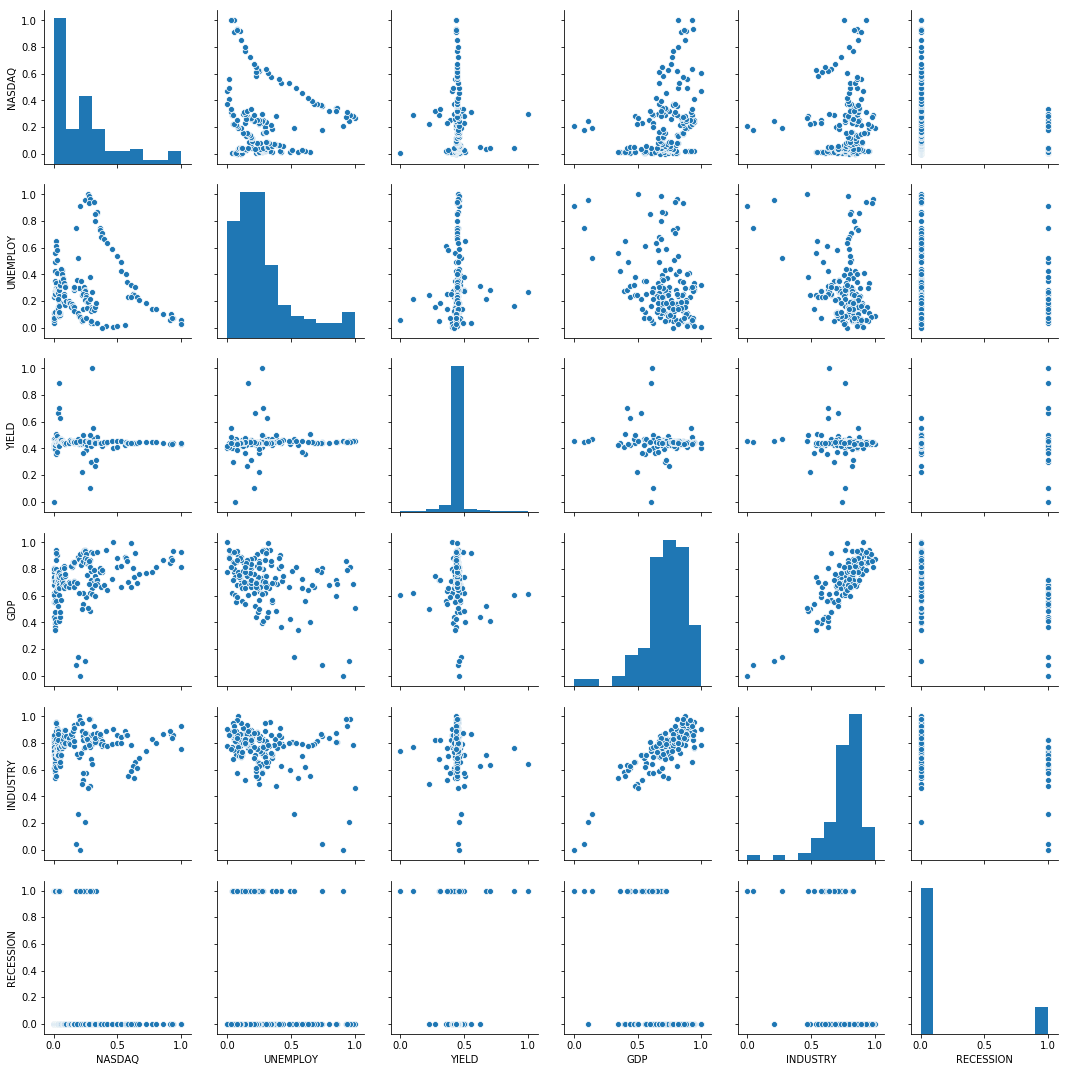

In [5]:
#Pair Plot to visualize how the data is distributed in dataset
pair_plot = sns.pairplot(data)

**Split the dataset into Training set and Testing set**

**Step 1:** divide the dataset into two categories: Features (Independent variables) and Target variable

**Features**

In [0]:
#Drop the columns DATE and RECESSION
features = data.drop(['DATE','RECESSION'],axis='columns')
features

,NASDAQ,UNEMPLOY,YIELD,GDP,INDUSTRY
0,0.000000,0.109383,0.436097,0.718043,0.849316
1,0.000157,0.080972,0.436757,0.678327,0.799668
2,0.002093,0.052942,0.435232,0.777056,0.823389
3,0.003713,0.059144,0.431336,0.741346,0.819877
4,0.002396,0.050066,0.412620,0.810952,0.847382
5,0.003122,0.054882,0.406745,0.804673,0.863725
6,0.004145,0.036761,0.406621,0.619261,0.768661
7,0.005598,0.058866,0.000000,0.606788,0.741711
8,0.005313,0.071097,0.467182,0.550353,0.708889
9,0.006599,0.114580,0.461548,0.557648,0.708486


**Target Variable**

In [0]:
target = data['RECESSION']
target

0      0
1      0
2      0
3      0
4      0
5      0
6      1
7      1
8      1
9      1
10     1
11     0
12     0
13     0
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
137    0
138    0
139    0
140    0
141    0
142    0
143    0
144    0
145    0
146    0
147    0
148    0
149    0
150    0
151    0
152    0
153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
163    0
164    0
165    0
166    0
Name: RECESSION, Length: 167, dtype: int64

**Step 2:** Split the Features and Target variable into Training and Testing sets

In [0]:
from sklearn.model_selection import train_test_split
from IPython.display import Image

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
cols = list(features.columns)
#Split the faetures and target variable in the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

**Print the shape of training and test data**

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(133, 5)
(133,)
(34, 5)
(34,)


**Train the Decision Tree classifier**

In [0]:
#Create an instance of the model with depth = 5
model = tree.DecisionTreeClassifier(max_depth = 5)

#Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Predict the results on test data**

In [0]:
#Predict the probability of upcoming recession
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

**Calculate the Accuracy score**

In [0]:
#Calculate the accuracy
# Accuracy = TP+TN/TP+FP+FN+TN 
print(accuracy_score(y_test,y_pred))

0.7941176470588235


**Visualize the Decision tree classifier**

In [0]:
#Import the decision tree module
from sklearn import tree
tree_dot_data = tree.export_graphviz(model,
                     out_file = "recessionDCTree.dot",
                     feature_names = features.columns.values,
                     filled=True, rounded=True, special_characters=True)

In [0]:
!dot -Tpng recessionDCTree.dot -o recessionDCTree.png

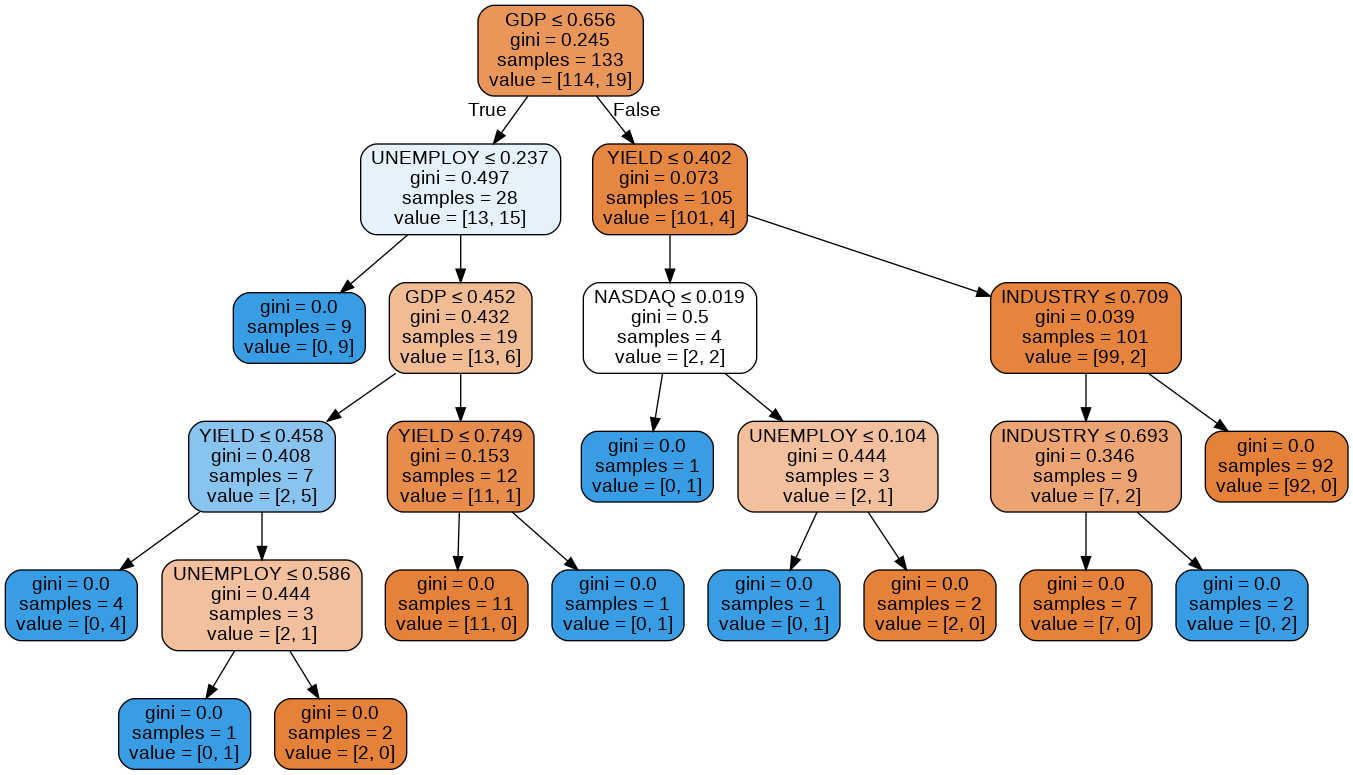

In [0]:
PATH = !pwd
Image(filename = PATH[0] + "/recessionDCTree.png")

**Random Forest Implementation**

**Train the Random Forest classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=8,random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

79.41176470588235


**Visualize the Random Forest classifier**

In [0]:
def gettreeImg(clf,columns):
    dot_data = tree.export_graphviz(clf,
                                    feature_names=columns,
                                    out_file=None,
                                    filled=True,
                                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    colors = ('turquoise', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])
    return graph

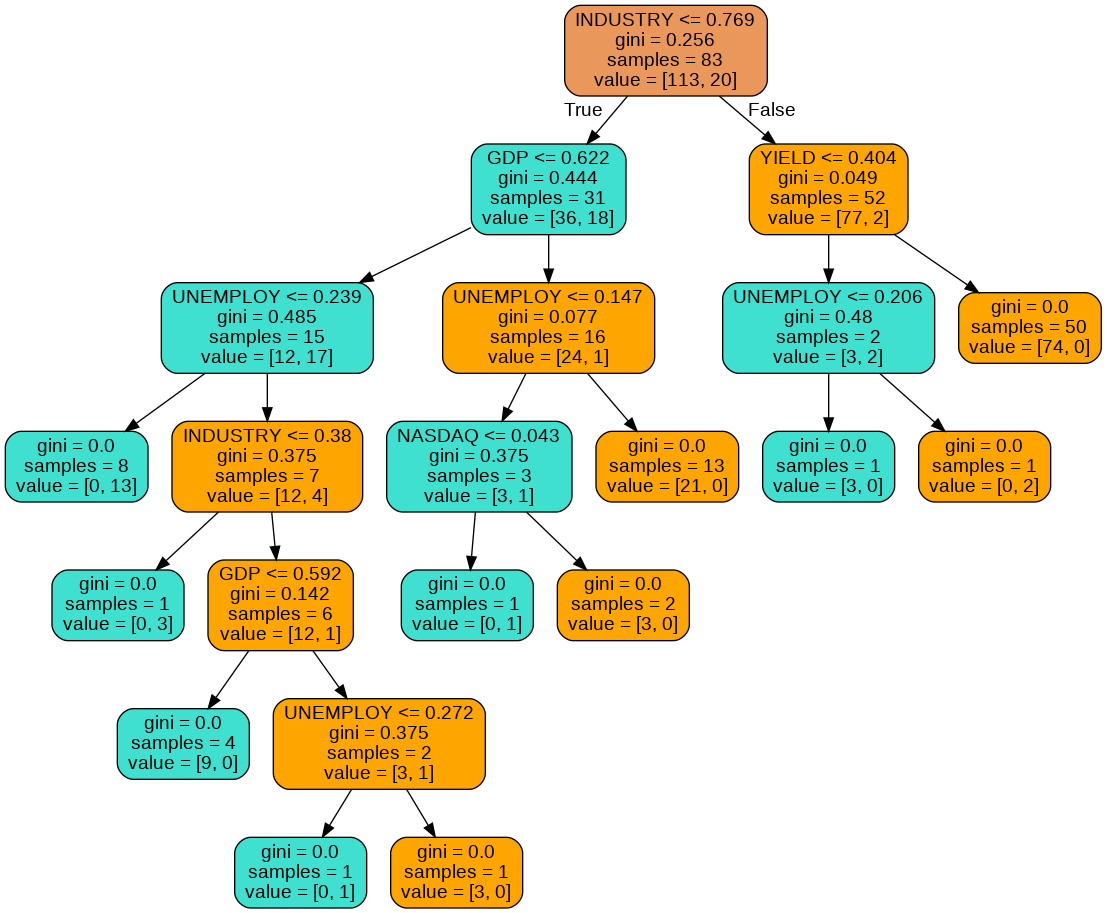

In [0]:
from IPython.display import Image
import pydotplus
import collections
Image(gettreeImg(clf.estimators_[5],cols).create_png())

**Print Classification report**

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.50      0.29      0.36         7

    accuracy                           0.79        34
   macro avg       0.67      0.61      0.62        34
weighted avg       0.76      0.79      0.77        34



**Print Confusion matrix**

In [0]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=[ 'predicted_average', 'predicted_excellent'],
    index=[ 'true_average', 'true_excellent']
)

,predicted_average,predicted_excellent
true_average,25,2
true_excellent,5,2
